<a id='top'></a>

# Homework 5: Bootstrap, Hypothesis Testing and Regression
***

**Name**: Aaron Li

***

This assignment is due on Moodle by **5 PM on Friday April 19**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) 

---

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
from prettytable import PrettyTable
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [15 points] Problem 1 - Hypothesis Testing Whether your Co-worker is a Doofus 

You are working as a Data Scientist for an internet-based hedgehog deliver company. Your co-worker, Daley Jennanigans, is a lovable scamp! Unfortunately, Daley also makes a lot of mistakes throughout the day as the two of you team up to tackle some inference work regarding your company's hedgehog-loving customers. In each case, clearly explain why Daley's hypothesis testing setup or conclusion is incorrect.

**Part A**: Daley has some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the proportion of last month's website visitors that bought a hedgehog. Let $X$ be the random variable describing the number of website visitors who bought a hedgehog in the previous month, and suppose that the population proportion of visitors who bought a hedgehog is $p$. Daley is interested to see if the data suggests that more than 20% of website visitors actually buy a hedgehog.  He decides to perform the test with a null hypothesis of $H_0: \hat{p} = 0.20$.

**Part A answer:**

Daley's null hypothesis testing is incorrect. This is because Daley used the notation of $\hat{p}$ instead of p. The only time $\hat{p}$ is used is when only a porportion of the population is known however, in this situation, we know that the sample is is the entire population so we denote it with $\textbf{p}$ instead of $\hat{p}$

You'll get em next time Daley (ू˃̣̣̣̣̣̣︿˂̣̣̣̣̣̣ ू)

**Part B**: Daley decides instead to do his hypothesis test with a null hypothesis of $H_0: p < 0.20$.  

**Part B answer:**

Daley's Null hypothesis is not incorrect because  $H_0: p < 0.20$ does not give the most conservative estimate anymore. If we take this new $H_0$ and if the complement, $H_1$ we get $H_1: p \geq 0.20$ which is not what were testing since what we want to prove is that the data suggest more than 20% of website visitors not greater than or equal to 20% of website visitors.

Come on Daley (ノಠ益ಠ)ノ彡┻━┻

**Part C**: Now Daley is finally on track with reasonable hypotheses of $H_0: p = 0.20$ and $H_1: p > 0.20$. Daley computes for the sample proportion a normalized test-statistic of $z = 2.4$ and states that since $z = 2.4 > 0.01$ there is insufficient statistical evidence at the $\alpha = 0.01$ significance level to conclude that the proportion of customers who buy a hedgehog is greater than 20%.

Daley is wrong again (,,#ﾟДﾟ)!!! While he is close, he forgot to compute the z value for an $\alpha=.01$ which is $z_{\alpha}=stats.norm.ppf(.99)\approx 2.33$. Next, because the alternative hypothesis is $\theta>\theta_0$ we want $z\geq z_{alpha}$ in order to reject the null hypothesis and ebcause $2.4\geq2.33$ we can reject the null hypothesis and say that there propotion of customers that buy hedgehogs are greater than 20%.

**Part D**: Daley is again conducting the hypothesis test of $H_0: p = 0.20$ and $H_1: p > 0.20$, and found the test-statistic $z=2.4$. Daley computes his p-value as:
$$\text{p-value} = \texttt{stats.norm.cdf(2.4)} = 0.9918$$

Since his p-value (0.9918) is greater than the significance level (0.01), Daley again claims that there is insufficient evidence at the 1% significance level to conclude that the proportion of customers who buy a hedgehog is greater than 20%.

Daley your set up is incorrect ( >д<)/. The alternative hypothesis is  $\theta>\theta_0$ so instead of our the $\text{p-value} = \texttt{1-stats.norm.cdf(2.4)} = 1-0.9918=.0082$. We then see that $.0082<.01$ so we reject the null hypothesis and the proportion of customers that that buy hedgehogs is greater than 20%

**Part E**: Daley is again conducting the hypothesis test of $H_0: p = 0.20$ and $H_1: p > 0.20$. Suppose he computes a p-value of $0.03$, and then concludes that there is only a 3% probability that the null hypothesis is true. 

Daley you are incorrect but this is a common misconception so I'll give you some slack (((￣へ￣井).  The p-value you calculated is not the probability that the null hypothesis is true, the p-value is the probability of how likely the data is to occur assuming the null hypothesis is true.

<br>

---
[Back to top](#top)
<a id='p2'></a>

### [25 points] Problem 2 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 10 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be approximately normally distributed. The mean reaction times (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 10 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 10 & 494.2 & 39.6 \\ 
\textrm{Nap} & 10 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 95% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Set up your calculations by hand, and report the results in Markdown/MathJax. Of course, you can and should use Python as a calculator.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

In [26]:
t=stats.t.ppf(1-.025,df=9)
bottom=np.sqrt(10)
Coffee_Nap_max=451.3+t*(31.9/bottom)
Coffee_Nap_min=451.3-t*(31.9/bottom)
Coffee_max=494.2+t*(39.6/bottom)
Coffee_min=494.2-t*(39.6/bottom)
Nap_max=492.8+t*(45.2/bottom)
Nap_min=492.8-t*(45.2/bottom)
print("Coffee+nap confidence interval is,", [Coffee_Nap_min,Coffee_Nap_max] )
print("Coffee confidence interval is,", [Coffee_min,Coffee_max] )
print("Nap confidence interval is,", [Nap_min,Nap_max] )

Coffee+nap confidence interval is, [428.48011470011295, 474.1198852998871]
Coffee confidence interval is, [465.8718665242781, 522.5281334757218]
Nap confidence interval is, [460.46586785094377, 525.1341321490563]


In order to calculate the mean reaction time with a confidence interval of 95% for each group the following equation will be used $$\bar{x}\pm t_{.025,9} *\frac{s}{\sqrt{n}}$$ where $t_{.025,9}$ is the confidence interval value and the degrees of freedom respectively.
Using python as a calculator, we find that $t=2.262157162740992$,$n=10$ and $s=STD$.

Group of Coffee+Nap we get:
$$451.3 \pm 2.262*\frac{31.9}{10}= [444.0837, 458.5163]$$

Group of Coffee we get:
$$494.2 \pm 2.262*\frac{39.6}{10}=[485.2419, 503.158]$$

Group of Nap we get:
$$492.8 \pm 2.262*\frac{45.2}{10}=[482.575, 503.0249]$$

1. The Coffee-naps group had better reaction times than both the nap group and coffee group since the max interval for Coffee-naps is lower than the min value of the other two groups meaning be because there is no overlap in the confidence interval we can be at least 95% certain that having coffee and taking a nap increase your reaction time.

2. We use a t-distribution because are sample size is small and because the mean reaction time measurement was found to be approximately normally distributed. When these 2 facts are true we always use a t-distibution to approximate a normal distribution.

**Part B**: Use a **rejection region hypothesis test** to determine if there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Note** that the number of degrees of freedom for a two-sample t-test is $df_1 + df_2 = (n_1-1) + (n_2-1) = n_1 + n_2 - 2$ (where $n_1$ and $n_2$ are the number of data points from each of the two samples). All other mechanics are the same as the two-sample z-tests we know and love.

In [27]:
tot_df=18 #10+10-2
mean_nap=492.8
mean_coffe=494.2
sigma_nap=45.2 # I think this is right
sigma_coffe=39.6
bottom= np.sqrt(((sigma_nap**2)/(10)+(sigma_coffe**2)/(10)))
t=((mean_nap-mean_coffe)/(bottom))
t_alpha=stats.t.ppf(.05,df=18)
print(t,t_alpha)

-0.07367196689546883 -1.734063606617536


In order to find the whether or not a nap promotes faster reaction time than drinking coffee, we must first set up our null and alternative hypothesis.

$H_0: \bar{x}_{nap}= \bar{x}_{coffee}$ 

$H_1: \bar{x}_{nap}<\bar{x}_{coffee}$ since smaller reaction time is better

Next, we use the following formula to compute our t-value: $$t=\frac{\bar{x}_{nap}-\bar{x}_{coffee}-c}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}$$ where c=0 in this case.

and then compare it to $t_{.05}=stats.t.ppf(.95,df=n_1+n_2-2)$ and if $z\leq z_{\alpha}$ we reject the null hypothesis otherwise, we do not reject the null hypothesis.


When we calulated the values, $t=-.0736719$, and $t_{alpha}=-1.734$ and because z is **not** $\leq t_{\alpha}$ we do not reject the null hypothesis  that naps promtes faster reaction times then drinking coffee

**Part C**: Perform an appropriate hypothesis test (you may use either p-values or rejection region) to determine if there is sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap. So, there should be two separate hypothesis tests, but they are seeking to show similar results (one for coffee-nap versus coffee-only, and one for coffee-nap versus nap-only). Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

We will perform a 2 sample difference test. The equation used in part B will be used again.
 $$t=\frac{\bar{x}_{nap+coffe}-\bar{x}_{coffee}}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}$$
We will perform the following hypothesis test.

$H_0: \bar{x}_{nap+coffee}= \bar{x}_{coffee}$ 

$H_1: \bar{x}_{nap+coffee}<\bar{x}_{coffee}$ since smaller reaction time is better

Since our alternative hypothesis is $\theta<\theta_0$ we want our t<$t_{\alpha}$ to reject our null hypothesis

Nap comparison will also have the same layout as shown above expect we replace every $\bar{x}_{coffee}$ with $\bar{x}_{nap}$.


In [28]:
tot_df=18 #10+10-2
mean_nap_coffe=451.3
mean_coffe=494.2
mean_nap=492.8

sigma_nap_coffe=31.9 # I think this is right
sigma_coffe=39.6
sigma_nap=45.2

bottom_coffe= np.sqrt(((sigma_nap_coffe**2)/(10)+(sigma_coffe**2)/(10)))
bottom_nap= np.sqrt(((sigma_nap_coffe**2)/(10)+(sigma_nap**2)/(10)))

t_coffe=((mean_nap_coffe-mean_coffe)/(bottom_coffe))
t_nap=((mean_nap_coffe-mean_nap)/(bottom_nap))
t_alpha=stats.t.ppf(.05,df=18)
print("The t value when compared coffee and nap to just coffee is", t_coffe, "and out t alpha is,", t_alpha)
print("The t value when compared coffee and nap to just nap is", t_nap,"and out t alpha is,", t_alpha)


The t value when compared coffee and nap to just coffee is -2.6678557635847664 and out t alpha is, -1.734063606617536
The t value when compared coffee and nap to just nap is -2.37214516432695 and out t alpha is, -1.734063606617536


Because we found that the $t$<$t_{alpha}$ at every single in both cases. We can reject the null hypothesis that taking a nap and drinking coffee gives the same reaction time as just taking or drinking coffee.

**Part D:** Is there sufficient evidence at the 95% confidence (5% significance) level to support claim that the reaction time after a coffee-nap is at least 20 ms faster than the reaction time after a coffee only? Fully justify your answer and show all work demonstrating this conclusion using a **p-value hypothesis test**. 

We will use the same equation above as shown above except $c=20$. After we compute our t-value, we will then find the p-value by finding the cdf and restraining the degrees of freedom by $n_1+n_2-2=18$ using the function $stats.t.cdf(t, df=18)$.
So we find that $$t=\frac{451.3-494+20}{\sqrt{\frac{31.9^2}{10}+\frac{39.6^2}{10}}}$$

$H_0: \bar{x}_{nap+coffee}= \bar{x}_{coffee}-20$ 

$H_1: \bar{x}_{nap+coffee}<\bar{x}_{coffee}-20$ since smaller reaction time is better

The $H_1$ is equivalent to stating that the average reaction time of drinking coffee and taking a nap is at least 20 ms faster than only drinking coffee.

In order to reject the null hypothesis, we will need to prove that $p<alpha$ since we have the alternative hypothesis of $\theta<\theta_0$

In [29]:
t_coffee_new=t_coffe=((mean_nap_coffe-mean_coffe+20)/(bottom_coffe))
t_alpha=stats.t.ppf(.05,df=18)
print("The t value at the .05 significance level for finding whether coffee and nap gives an reaction time that is 20 ms faster than coffe is", 
      t_coffee_new, "and out t alpha is,", t_alpha)
p_value=stats.t.cdf(t_coffee_new,df=18)
print("The p-value found is:", p_value)
print("The significance level is", .05)

The t value at the .05 significance level for finding whether coffee and nap gives an reaction time that is 20 ms faster than coffe is -1.424100162845947 and out t alpha is, -1.734063606617536
The p-value found is: 0.08576155679560281
The significance level is 0.05


Since we found that our $p-value=.0858$ and our $\alpha=.05$, that means $p-value>\alpha$ and therefore we fail to reject the null hypothesis.

**Part E**: Compute a 95% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

To find a confidence interval at the 95% confidence level for standard devation we will use the following equation:
$$ \sqrt{\frac{(n-1)*S^2}{\chi_{\alpha/2,n-1}^2}}< \sigma < \sqrt{\frac{(n-1)*S^2}{\chi_{1-\alpha/2,n-1}^2}} $$

In [30]:
def std_confidence(alpha,std,n):
    right=stats.chi2.ppf(alpha/2,n-1)
    left=stats.chi2.ppf(1-alpha/2,n-1)
    print(right,left)
    left_eq=np.sqrt((n-1)*(std**2)/left)
    right_eq=np.sqrt((n-1)*(std**2)/right)
    print(left_eq,right_eq)
std_confidence(.05,31.9,10)

2.7003894999803584 19.02276779864163
21.94194309529309 58.236964822374404


<br>

---
[Back to top](#top)
<a id='p3'></a>

### [40 points] Problem 3 - Simple Linear Regression for Science!

From [Google Trends](https://trends.google.com/trends/?geo=US) data, it appears that interest in "science" in the United States has been waning since about 2004. Interest is measured relative to the maximum rate of Google searches for that term over the time period (so the maximum is 100). 

**Part A:** Load up the data in `science_interest.csv` into a Pandas DataFrame. Create two new columns:
* `year` should be the year associated with that data point, and
* `month` should be the month (1-12) associated with that data point.

Then, make a **scatter plot** (using `pyplot.scatter`) of all of the data points, showing how interest in "science" has evolved over time. Label only the data point associated with January of each even year, and label with the year (and of course be sure to label your axes).

01


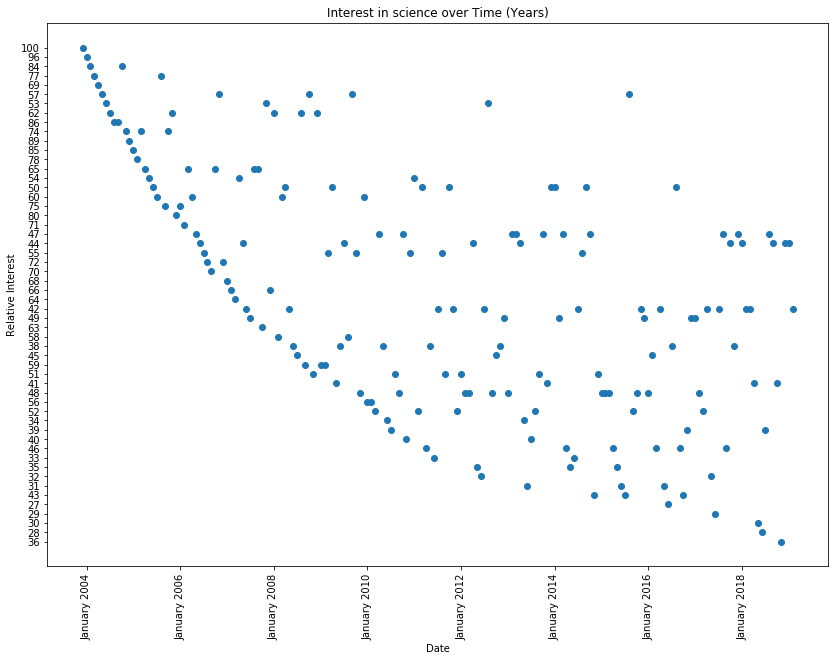

In [31]:
df = pd.read_csv("science_interest.csv", sep='\t')
df['Year'], df['Month']= df['Category: All categories'].str.split('-', 1).str
df['Month'], df['Science']= df['Month'].str.split(',', 1).str
df=df.drop(columns='Category: All categories')
df=df.iloc[1:]
df.head()
print(df['Month'][1])
x_axis=[]
x_tick=[]
x=[]
Max_year=np.max(df['Year'])
interest=df['Science']
label='January'
for i in range(1,len(df['Year'])):
    if np.mod(int(df['Year'][i]),2)==0 and int(df['Month'][i])==1:
        x_tick.append(i)
        year_string=str(df['Year'][i])
        x_axis.append(label+' '+year_string)
for i in range(len(df['Science'])):
    x.append(i)
plt.figure(figsize=(14,10))
plt.gca().invert_yaxis()
plt.scatter(x,df['Science'])
plt.xticks(x_tick,x_axis, rotation='vertical');
plt.xlabel("Date")
plt.ylabel("Relative Interest")
plt.title("Interest in science over Time (Years)");

**Part B:** These data (and the sea-level data from Homework 4) are a **time series**, where the independent variable is *time* and the dependent quantity is interest in science. One of the central assumptions of linear regression is that the data are observations generated by some process, independently of one another. With time series data, we need to be careful because there could be some other process affecting the output data. In particular, **annual cycles** are patterns that reoccur each year and are frequently present in time series data. For example, seasonal patterns of weather are annual cycles.

To see what kind of effect time has, make a **line plot** (using `pyplot.plot`) of the interest in science, as a function of time. Again, include all of the data points and, for the x-axis, label only the tick marks associated with January of even years, and be sure to label your axes.

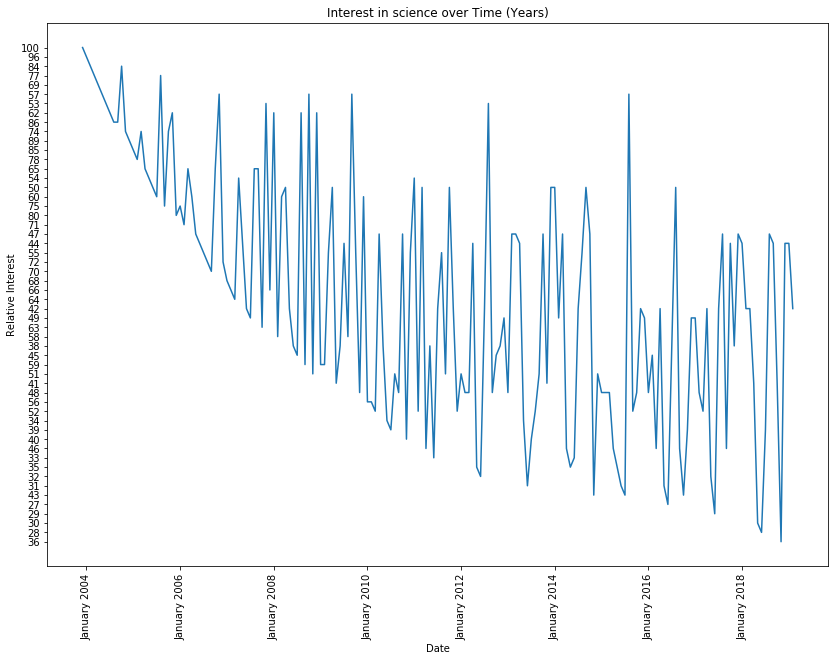

In [32]:
plt.figure(figsize=(14,10))
plt.gca().invert_yaxis()
plt.plot(x,df['Science'])
plt.xticks(x_tick,x_axis, rotation='vertical');
plt.xlabel("Date")
plt.ylabel("Relative Interest")
plt.title("Interest in science over Time (Years)");

**Part C:** Does your plot from Part B suggest that there is some annual cycle to the interest in science? During which months is interest in science highest? What about lowest? Justify your answers using your plot, **and** by computing the mean interest in science for each month. So, compute 12 values and report them in a table. Do **not** just spit out a horizontal list of 12 numbers. That would be yucky to try to read, and we're scientists, dammit.

What do you think accounts for the drop(s) in interest in science during those month(s)? Recall that these data are from the United States.

In [33]:
def mean_interest(data):
    means=[]
    for i in range(1,13):
        pls=[];
        pls=data[data["Month"].astype(int)==i]
        pls_mean=np.mean(pls["Science"].astype(int))
        means.append(pls_mean)
    return means
table=PrettyTable(["Month", "Mean"])
month=["January", "Febuary", "March", "April", "May", "June", "July", "August", "Septemeber", "October", "November","December"]
mean_list=mean_interest(df)
for i in range(0,12):
    table.add_row([month[i], round(mean_list[i],2)])
print(table)


+------------+-------+
|   Month    |  Mean |
+------------+-------+
|  January   | 60.94 |
|  Febuary   | 58.56 |
|   March    | 55.81 |
|   April    | 55.13 |
|    May     | 49.73 |
|    June    | 39.53 |
|    July    |  36.2 |
|   August   | 45.47 |
| Septemeber | 59.13 |
|  October   | 56.53 |
|  November  |  54.0 |
|  December  | 46.93 |
+------------+-------+


The lowest months of interest in science in the US is the months June and July. This could be due to the fact it's the summer time and people are on vacation and having fun outside instead of googling science. In addition, the majority of people googling science are students and there is no school during the the Months June and July.

**Part D:** (Spoiler alert!) Since there seems to be an annual cycle, one of the fundamental assumptions of our simple linear regression model is not satisfied. Namely, it is not the case that the model-data residuals, $\epsilon_i$, are independent of one another.

So, we need to process our data a bit further before fitting a regression model. One way to address this is to take the mean of all the data each year and use for analysis the time series of annual mean interest in science. Create a new Pandas DataFrame that consists only of two columns:
* `year`, and
* `interest`, the mean interest in science from the twelve months in that year.

In [34]:
def mean_interest_year(data):
    means=[]
    low=np.min(data["Year"].astype(int))
    high=np.max(data["Year"].astype(int))
    for i in range(low,high+1):
        pls=[];
        pls=data[data["Year"].astype(int)==i]
        pls_mean=np.mean(pls["Science"].astype(int))
        means.append(pls_mean)
    return means
mean_year=mean_interest_year(df)
# initialize list of lists 
data_year=[];
for i in range(16):
    data_year.append([i+2004, mean_year[i]])
  
# Create the pandas DataFrame 
year_interest = pd.DataFrame(data_year, columns = ['Year', 'Interest']) 
year_interest.head()

,Year,Interest
0,2004,77.333333
1,2005,70.250000
2,2006,63.416667
3,2007,58.750000
4,2008,54.166667


**Part E:** Perform a simple linear regression with `year` as the feature and `interest` as the response (mean annual interest in science).  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

Then make a scatter plot of the mean annual interest in science as a function of year, and overlay the estimated regression line. Label your axes and provide a legend.

The Slope is:  -2.0285539215686272
The Intercept is:  4131.6601715686265


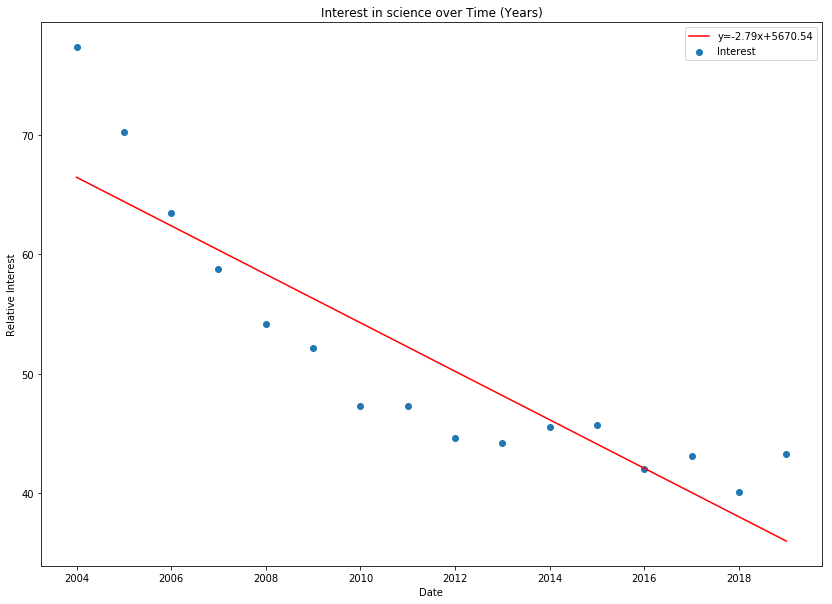

In [35]:

slope, intercept, r_value, p_value, std_err = stats.linregress(year_interest["Year"],year_interest["Interest"])
print("The Slope is: ", slope )
print("The Intercept is: ", intercept )
fig,ax=plt.subplots(nrows=1, ncols=1, figsize=(14,10))
ax=plt.xlabel("Date")
ax=plt.ylabel("Relative Interest")
ax=plt.title("Interest in science over Time (Years)");
ax=plt.scatter(year_interest['Year'],year_interest['Interest'])
ax=plt.plot(year_interest["Year"], slope*year_interest["Year"]+intercept, '-r', label='y=-2.79x+5670.54')
ax=plt.legend()

**Part F**: Give a physical interpretation of the coefficient $\hat{\beta}$, estimated from your model. Include addressing whether the relationship between time and interest in science is positive or negative. Fully justify your responses.

The physical interpretation of $\hat{\beta}$ is the change in interest in science over time. Because the slope is negative that means the interest has been decreasing over time. Specifically, the interest in science is decreasing every year by about 2% relative to the maximum interest point. For example, If 2004 was the maximum interest point with suppose 100,000 searches it would have an interest of 100 and if 2012 had an interest rating of 60 that would mean it would only have had 60,000 searches 

**Part G**: What interest in science does your simple linear regression model predict in the year 2030? What about in 2050? What are potential drawbacks to this model for interest in science?

In [36]:
print("The interest in science in 2030 relative to the max interest point will be",slope*2030+intercept)
print("The interest in science in 2050 relative to the max interest point will be",slope*2050+intercept)

The interest in science in 2030 relative to the max interest point will be 13.695710784313633
The interest in science in 2050 relative to the max interest point will be -26.875367647059647


As the years increase, our model will predict that the interest will also continue to decrease leading to negative interest as time continues, which is not possible. This graph is better fitted by an exponential graph because there can never be less than 0 interest which will happen as time increases and will go above 100 as we go back in time.

**Part H:** Compute a 66% confidence interval for the slope parameter, $\beta$, ***by hand***. This means performing all calculations yourself in Python, as opposed to calling a simple Python function that gives you the result. Why is this a confidence interval for $\beta$ and not for $\hat{\beta}$?

The equation for finding confidence interval for $\beta$ is $$\hat{\beta}\pm t_{\frac{\alpha}{2},df=n-2}*\frac{\hat{\sigma}}{\sqrt{\sum_{i=1}^{n} (x_i-\bar{x})^2}}$$

where $\hat{\sigma}=\sqrt{\frac{SSE}{n-2}}$, $SSE=\sum_{i=1}^{n}(y_i-\hat{y_i})^2$, and $\hat{y}=\hat{\alpha}+\hat{\beta}*x_i$

In [37]:
def CI_beta(data):
    alpha=.34
    #step 1. Calculate STERR and beta hat by using function
    slope, intercept, r_value, p_value, std_err = stats.linregress(data["Year"],data["Interest"])
    #Step 2. find the t value
    t_alpha=stats.t.ppf(.34/2,df=len(data)-2)
    CI_min=slope-(t_alpha*std_err)
    CI_max=slope+(t_alpha*std_err)
    CI=[CI_min, CI_max]
    print("The confidence interval for Beta is", CI )
    
CI_beta(year_interest)

The confidence interval for Beta is [-1.749630814862687, -2.3074770282745676]


This is a confidence interval for $\beta$ and not $\hat{\beta}$ because we have the entire 

**Part I:** What proportion of the variation in mean annual interest in science is explained by your linear regression model?

In [38]:
print("The proportion of the variation in the mean annual interest in science is", (r_value)**2)

The proportion of the variation in the mean annual interest in science is 0.7866326755553371


**Part J:** Make a scatter plot of the residuals from this simple linear regression model, relative to the annual mean interest data (and be sure to label your axes). Make a conjecture about what kind of additional feature, also based on `year`, should be added to improve the fit of the model. Note that this new model with have your new feature _and_ `year`, making it a _multiple linear regression_ model.

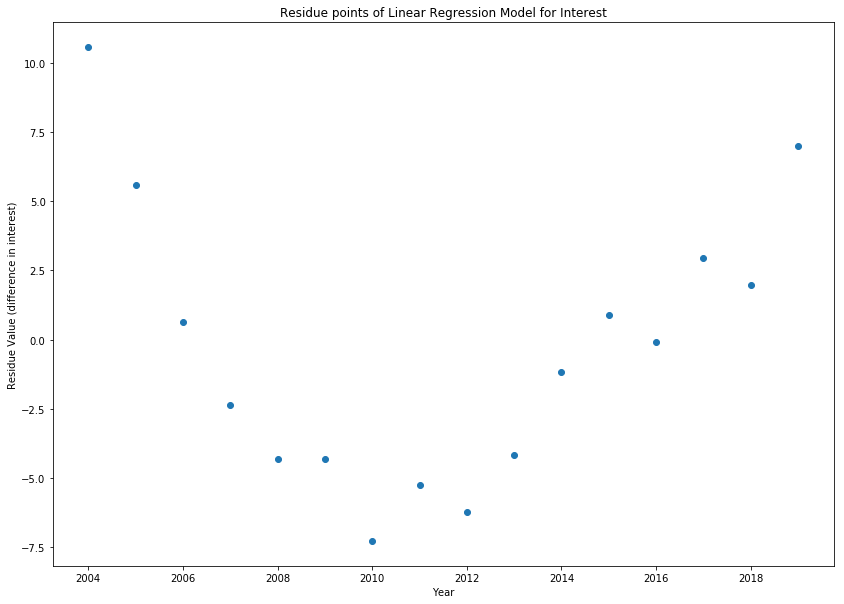

In [39]:
points=[]
for i in range(1,len(df['Year'])):
    if np.mod(int(df['Year'][i]),1)==0 and int(df['Month'][i])==1:
        points.append(slope*int(df['Year'][i])+intercept)

residue=np.subtract(year_interest['Interest'].astype(int),points)

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(14,10))
ax.scatter(year_interest['Year'], residue);
plt.title("Residue points of Linear Regression Model for Interest")
plt.ylabel("Residue Value (difference in interest)")
plt.xlabel("Year");

After observing the plot, we can see that there is still a pattern within are residue plots meaning, we need to add more features in order to make our simple linear regression plot more accurate. This feature must explain variance of science searches instead of a continour decrease in value. This feature could be explained by the increase in specialized jobs over the years. This means that people who are interested in difffernt fields of science search for terms instead of broadly searching science in general. For example, a student who is very interested in plants may search botany instead of science and likewise a person who is interested in anesthesiology will search that instead of a broad defintion of science. This means that interest in science could still be increasing its just that now people are searching in specific fields of science instead of just science because people know what they want to do nowadays.

<br>

---
[Back to top](#top)
<a id='p4'></a>

### [20 points] Problem 4 - Choose-Your-Own Simple Linear Regression Adventure

The interest in science data from the previous problem was from [Google Trends](https://trends.google.com/trends/?geo=US). From that main page, you can enter a particular search term and view the interest in that term over time. By default, the data displayed will be weekly data for the past year. You can ask for different time periods or regions as well (my link above defaults to the United States).

**Part A:** Download data from Google Trends for a search term, region and time period of your choice. (Alternatively, you can also use data from whatever source you would like, as long as it is a time series.) Then:
* clearly state what your search term, region and time period are (or fully describe your other data set),
* load your data as a Pandas DataFrame, and
* make a plot of the data over the entire time frame. Be sure to label your axes clearly.

**NOTE:** be sure to **leave your plot cell executed** because you are not asked to host the data or provide the data set with the homework submission. If your plot is not readily visible when we open your notebook for grading, then you can earn a maximum of 10 points for this problem. 

I took the search term Nintendo, over a 5 year period across the entire US.

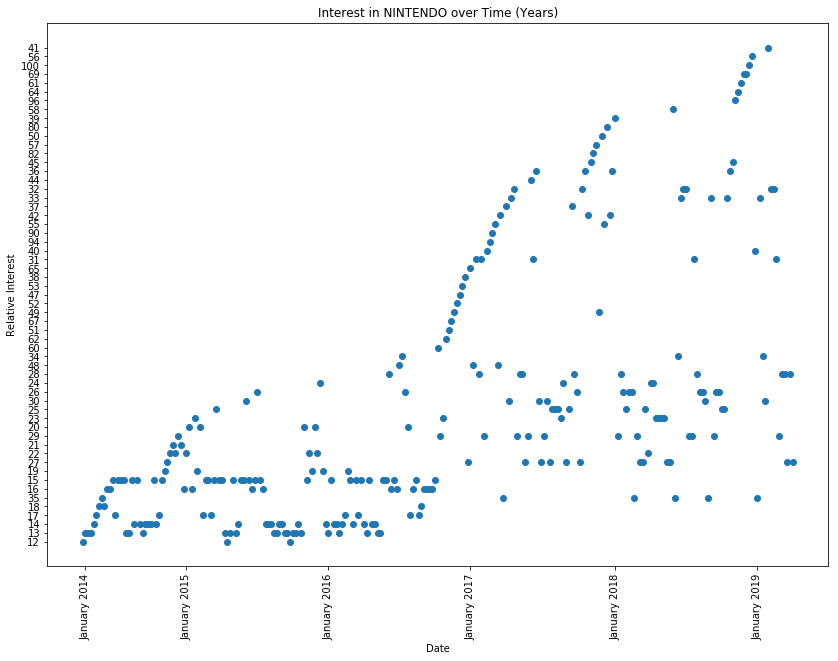

In [40]:
Nin = pd.read_csv("Nintendo.csv", sep='\t')
Nin['Year'], Nin['Month']= Nin['Category: All categories'].str.split('-', 1).str
Nin['Month'], Nin['Nintendo']= Nin['Month'].str.split(',', 1).str
Nin=Nin.drop(columns='Category: All categories')
Nin=Nin.iloc[1:]
nin_x=[]

nin_tick=[]
nin_axis=[]
check=0;
begin=2014;
for i in range(1,len(Nin['Year'])-1):
    if np.mod(int(Nin['Year'][i]),begin)==0 and check!=int(Nin['Year'][i+1]):
        begin+=1
        check=int(Nin['Year'][i])
        nin_tick.append(i)
        year_string=str(Nin['Year'][i])
        nin_axis.append("January"+" "+year_string)

for i in range(len(Nin['Nintendo'])):
    nin_x.append(i)

plt.figure(figsize=(14,10))
plt.scatter(nin_x,Nin['Nintendo'])
plt.xlabel("Date")
plt.xticks(nin_tick,nin_axis, rotation='vertical');
plt.ylabel("Relative Interest")
plt.title("Interest in NINTENDO over Time (Years)");

**Part B:** Based on your figure from Part A, formulate a hypothesis regarding whether or not a statistically significant linear trend exists. Clearly state your null and alternative hypotheses, and the level of significance you will use for this hypothesis test. If you have reason to believe some kind of a trend that is *not linear* exists, say so.

Hypothesis Test at the 99% confidence interval.

The interest in nintendo has not increased by at more than 3% a year $H_0: \beta=3$

The interest in nintendo has increased by at more than 3% a year $H_1: \beta>3$

**Part C:** Perform any processing that you need to do in order to satisfy the assumptions of the simple linear regression model. If you do not do any processing, then explain why you believe your data set already satisfies these assumptions (and clearly state the assumptions).

In [41]:
def mean_interest_year(data):
    means=[]
    low=np.min(data["Year"].astype(int))
    high=np.max(data["Year"].astype(int))
    for i in range(low,high+1):
        pls=[];
        pls=data[data["Year"].astype(int)==i]
        pls_mean=np.mean(pls["Nintendo"].astype(int))
        means.append(pls_mean)
    return means
nin_mean_year=mean_interest_year(Nin)
print(nin_mean_year)
# initialize list of lists 
data_year=[];
for i in range(6):
    data_year.append([i+2014, nin_mean_year[i]])
  
# Create the pandas DataFrame 
nin_year_interest = pd.DataFrame(data_year, columns = ['Year', 'Interest']) 
nin_year_interest.head()

[16.83783783783784, 16.557692307692307, 23.673076923076923, 38.716981132075475, 35.48076923076923, 31.666666666666668]


,Year,Interest
0,2014,16.837838
1,2015,16.557692
2,2016,23.673077
3,2017,38.716981
4,2018,35.480769


**Part D:** Compute **by hand** the p-value associated with the hypothesis test from Part B. Clearly state your conclusion. You may use `scipy.stats.linregress` to check your answer, and you may use Python as a calculator (and to get critical values, for example), but you need to show all your work by hand.

For this problem I will use the following equation to get the t-value $t=\frac{\hat{\beta}-c}{SE(\hat{\beta})}$ and since our alternative hypothesis is $\theta>\theta_0$ we will use the equation $p-value=1-cdf(t,n-1)$. Finally, we will then check if $p_{value}\leq\alpha$

In [42]:
#find beta hat and the standard error. 
slope, intercept, r_value, p_value, std_err = stats.linregress(nin_year_interest["Year"],nin_year_interest["Interest"])
c=3
t=(slope-3)/(std_err)
# find the p-value
p_value=1-stats.t.cdf(t,df=len(nin_year_interest)-1)
print("The p value is", p_value)

The p value is 0.23008523129607883


In this problem, $c=3$ $\beta=4.17$ $SE(\hat{\beta})=1.4633$. Plugging into the equation shown above, we find $t\approx .7997$. Once the t value is found, it is plugged in to the cdf function in order to get the p-value and restrict the degrees of freedom to n-1 which in this case is 5 so, $1-cdf(t,5)=.23008$ and because $p_{value}>\alpha =.23008>.01$ we cannot reject the null hypothesis at the 99% confidence level. This means that we cannot be 99% sure that the interest in nintendo has increase every year by at least 3%.
